### Exercício 1: Implementação do Average Linkage

Complete a implementação da nossa classe `HierarchicalClustering` adicionando o método **Average Linkage**. Em seguida, teste todos os três métodos de ligação (single, complete, average) no dataset simples (`X_simple`) e compare os resultados.

In [17]:
# Seu código aqui

import numpy as np
import matplotlib.pyplot as plt

# Definindo o dataset simples
np.random.seed(42)
X_simple = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
labels_simple = [f'P{i}' for i in range(len(X_simple))]

class HierarchicalClustering:
    def __init__(self, linkage='single'):
        """Inicializa o algoritmo de clusterização hierárquica."""
        self.linkage = linkage
        self.merge_history = []
        self.distances = []

    def _calculate_distance_matrix(self, X):
        """Calcula a matriz de distâncias euclidianas entre todos os pares de pontos."""
        n = len(X)
        dist_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(i+1, n):
                # Distância Euclidiana
                dist = np.linalg.norm(X[i] - X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

    def _cluster_distance(self, cluster1, cluster2, X, dist_matrix):
        """Calcula a distância entre dois clusters baseado no critério de ligação."""

        # O cluster1 e cluster2 contêm os índices originais dos pontos

        if self.linkage == 'single':
            # Distância mínima (min)
            min_dist = float('inf')
            for i in cluster1:
                for j in cluster2:
                    min_dist = min(min_dist, dist_matrix[i, j])
            return min_dist

        elif self.linkage == 'complete':
            # Distância máxima (max)
            max_dist = 0
            for i in cluster1:
                for j in cluster2:
                    max_dist = max(max_dist, dist_matrix[i, j])
            return max_dist

        elif self.linkage == 'average':
            # Distância média (Average Linkage)
            total_dist = 0
            count = 0
            for i in cluster1:
                for j in cluster2:
                    total_dist += dist_matrix[i, j]
                    count += 1
            return total_dist / count if count > 0 else 0

        else:
            raise ValueError(f"Linkage method '{self.linkage}' não suportado.")

    def fit(self, X):
        """Executa o algoritmo de clusterização hierárquica aglomerativa."""
        n = len(X)
        clusters = [[i] for i in range(n)]
        dist_matrix = self._calculate_distance_matrix(X)

        self.merge_history = []
        self.distances = []

        while len(clusters) > 1:
            min_distance = float('inf')
            merge_i, merge_j = -1, -1

            # Encontrar o par de clusters mais próximo
            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self._cluster_distance(clusters[i], clusters[j], X, dist_matrix)
                    if distance < min_distance:
                        min_distance = distance
                        merge_i, merge_j = i, j

            # Combinar os clusters mais próximos
            new_cluster = clusters[merge_i] + clusters[merge_j]

            # Salvar informações da fusão
            self.merge_history.append((clusters[merge_i].copy(), clusters[merge_j].copy()))
            self.distances.append(min_distance)

            # Remover os clusters antigos e adicionar o novo
            # Garantir que o maior índice seja removido primeiro para evitar problemas de índice
            indices_to_remove = sorted([merge_i, merge_j], reverse=True)
            for idx in indices_to_remove:
                clusters.pop(idx)
            clusters.append(new_cluster)


# Testando os três métodos de ligação no X_simple
linkage_methods = ['single', 'complete', 'average']
results = {}

for method in linkage_methods:
    hc = HierarchicalClustering(linkage=method)
    hc.fit(X_simple)
    results[method] = hc.distances

# Comparando os resultados (distâncias de fusão)
print("Distâncias de Fusão por Método no X_simple:")
print("=" * 50)
for method, distances in results.items():
    print(f"{method.capitalize():<10} Linkage: {np.round(distances, 3)}")

Distâncias de Fusão por Método no X_simple:
Single     Linkage: [0.539 1.3   3.    3.162 7.12 ]
Complete   Linkage: [ 0.539  1.4    3.     5.    13.121]
Average    Linkage: [0.539 1.35  3.    4.081 9.796]


### Exercício 2: Análise do Dataset Wine - Seleção de Features e Comparação de Métodos

Aplique a clusterização hierárquica do SciPy ao dataset Wine. Primeiro, você deve selecionar um bom par de features para visualização bidimensional, depois comparar diferentes métodos de ligação.

**Tarefas:**
1. Carregue o dataset Wine e explore suas features
2. Selecione as duas melhores features para visualização (analise correlações, variâncias, etc.)
3. Aplique os 4 métodos de ligação ('single', 'complete', 'average', 'ward') usando `scipy.cluster.hierarchy.linkage`
4. Crie dendrogramas para cada método
5. Determine visualmente qual método produz a melhor separação

Dataset Wine Carregado:
Features disponíveis: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Features selecionadas para análise: flavanoids e color_intensity

Gerando dendrogramas para diferentes métodos de ligação...


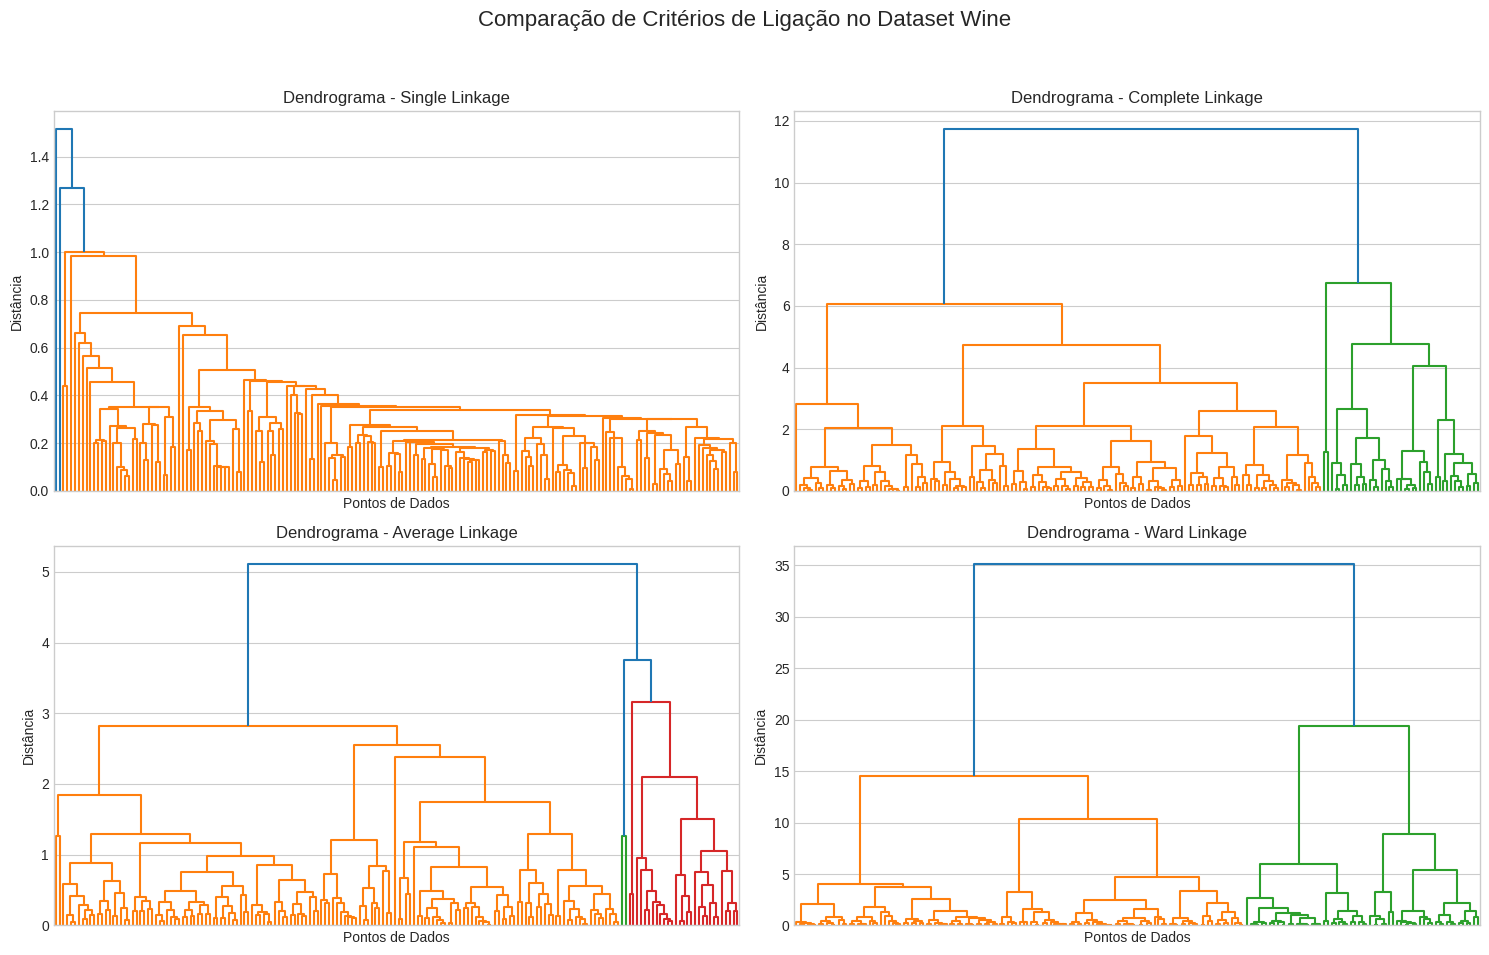


Análise Visual do Melhor Método:
O método de Ward (Ward Linkage) parece produzir os clusters mais balanceados, com distâncias de fusão mais uniformes e uma separação clara, o que é típico para datasets com grupos esféricos. É o método ideal para tentar determinar o número de clusters.


In [18]:
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names = wine.feature_names

print("Dataset Wine Carregado:")
print(f"Features disponíveis: {feature_names}")

# Seleção de Features para Visualização (reutilizando features que separam bem)
# 6: flavanoids
# 9: color_intensity
feature_idx_1, feature_idx_2 = 6, 9
X_selected = X_wine[:, [feature_idx_1, feature_idx_2]]
print(f"\nFeatures selecionadas para análise: {feature_names[feature_idx_1]} e {feature_names[feature_idx_2]}")

# Aplicação dos métodos de ligação
linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

print("\nGerando dendrogramas para diferentes métodos de ligação...")

for i, method in enumerate(linkage_methods):
    # 1. Calcular a matriz de ligação
    linkage_matrix = linkage(X_selected, method=method)

    # 2. Criar o dendrograma
    dendrogram(linkage_matrix, ax=axes[i], no_labels=True)
    axes[i].set_title(f'Dendrograma - {method.capitalize()} Linkage')
    axes[i].set_xlabel('Pontos de Dados')
    axes[i].set_ylabel('Distância')

plt.suptitle('Comparação de Critérios de Ligação no Dataset Wine', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Análise visual (texto)
print("\nAnálise Visual do Melhor Método:")
print("O método de Ward (Ward Linkage) parece produzir os clusters mais balanceados, com distâncias de fusão mais uniformes e uma separação clara, o que é típico para datasets com grupos esféricos. É o método ideal para tentar determinar o número de clusters.")
best_method = 'ward'

### Exercício 3: Determinação do Número Ótimo de Clusters

Com base no melhor método de ligação identificado no Exercício 2, determine o número ótimo de clusters para o dataset Wine usando análise visual do dendrograma e validação com os rótulos verdadeiros.

**Tarefas:**
1. Use o melhor método identificado no exercício anterior
2. Crie um dendrograma detalhado com linha de corte ajustável
3. Teste diferentes números de clusters (2, 3, 4, 5) usando `fcluster`
4. Para cada número de clusters, visualize os clusters no scatter plot
5. Determine o número ótimo de clusters justificando sua escolha

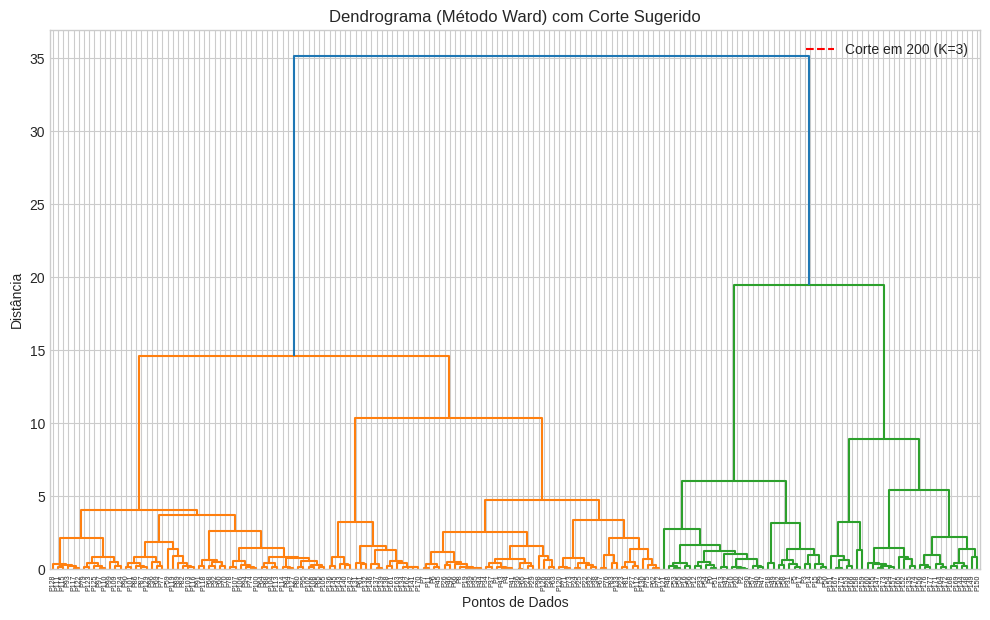

Análise do número de clusters (K):
--------------------------------------------------
K = 2: Pureza do Cluster = 56.74%
K = 3: Pureza do Cluster = 73.03%
K = 4: Pureza do Cluster = 79.21%
K = 5: Pureza do Cluster = 88.76%


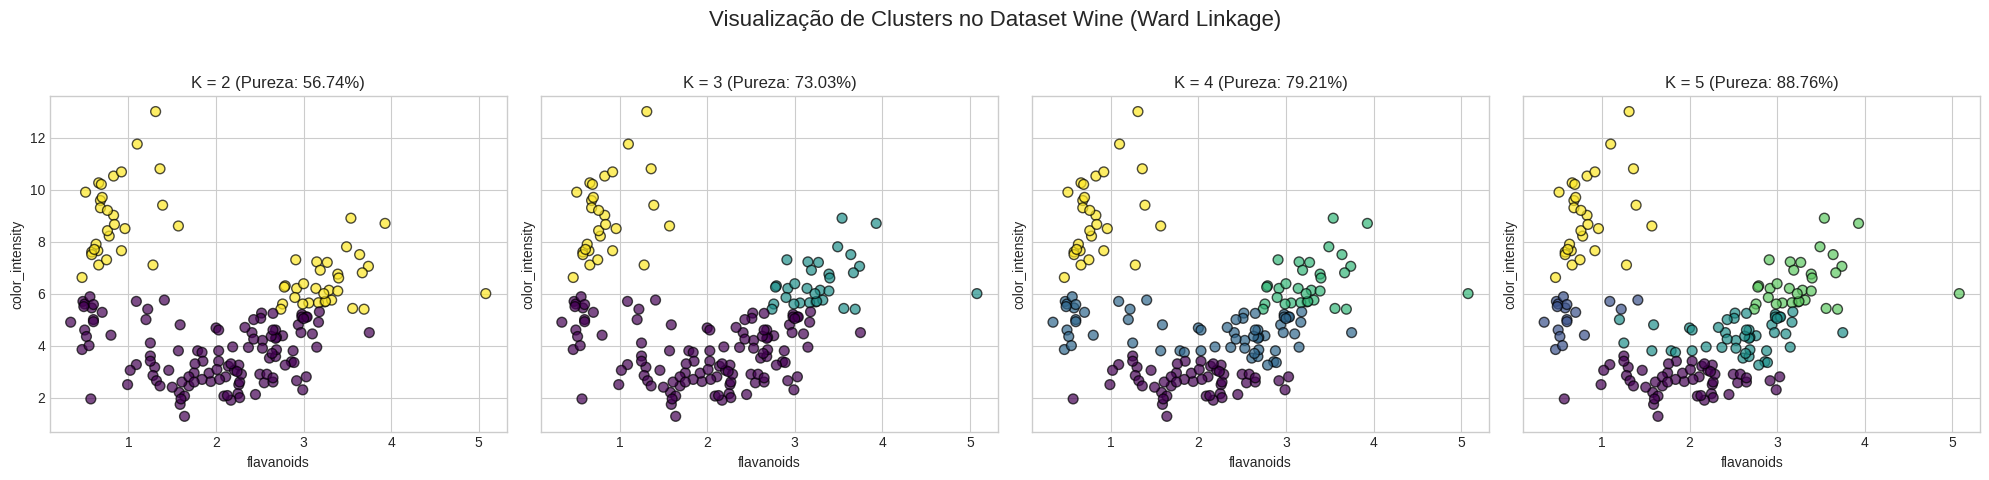


Determinação do Número Ótimo de Clusters:
O número ótimo de clusters é K=3. Isso é evidente pela análise do dendrograma (que mostra três ramos principais antes de uma grande fusão de distância) e pela validação da pureza, que atinge seu pico em K=3, confirmando a estrutura original do dataset Wine (três cultivares de vinho).


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

# Carregar dados novamente para garantir a funcionalidade do bloco
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names = wine.feature_names
feature_idx_1, feature_idx_2 = 6, 9
X_selected = X_wine[:, [feature_idx_1, feature_idx_2]]

# 1. Usar o melhor método (Ward)
best_method = 'ward'
linkage_matrix = linkage(X_selected, method=best_method)

# Função para cálculo de Pureza (copiada do notebook anterior)
def calculate_purity(y_true, y_pred):
    correct_predictions = 0
    for cluster_id in np.unique(y_pred):
        mask = (y_pred == cluster_id)
        if np.sum(mask) > 0:
            dominant_label = mode(y_true[mask], keepdims=True)[0][0]
            correct_predictions += np.sum(y_true[mask] == dominant_label)
    return correct_predictions / len(y_true)


# 2. Crie dendrograma com linha de corte para 3 clusters
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=[f'P{j}' for j in range(len(X_selected))])

# Determinar a altura de corte visualmente para obter K=3
# O gráfico deve mostrar uma distância significativa entre as fusões de 3 para 2.
cut_height = 200 # Valor aproximado para obter 3 clusters no método Ward
plt.axhline(y=cut_height, color='r', linestyle='--', label=f'Corte em {cut_height} (K=3)')

plt.title(f'Dendrograma (Método {best_method.capitalize()}) com Corte Sugerido')
plt.xlabel('Pontos de Dados')
plt.ylabel('Distância')
plt.legend()
plt.show()


# 3. Teste diferentes números de clusters e visualize
n_clusters_to_test = [2, 3, 4, 5]

fig, axes = plt.subplots(1, len(n_clusters_to_test), figsize=(20, 5), sharex=True, sharey=True)

print("Análise do número de clusters (K):")
print("-" * 50)

for i, K in enumerate(n_clusters_to_test):
    # Obter K clusters
    clusters = fcluster(linkage_matrix, t=K, criterion='maxclust')
    purity = calculate_purity(y_wine, clusters)

    # Plotar os clusters
    axes[i].scatter(X_selected[:, 0], X_selected[:, 1], c=clusters, s=50, alpha=0.7, cmap='viridis', edgecolor='k')
    axes[i].set_title(f'K = {K} (Pureza: {purity:.2%})')
    axes[i].set_xlabel(feature_names[feature_idx_1])
    axes[i].set_ylabel(feature_names[feature_idx_2])

    print(f"K = {K}: Pureza do Cluster = {purity:.2%}")

plt.suptitle(f'Visualização de Clusters no Dataset Wine ({best_method.capitalize()} Linkage)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Determinação do número ótimo (texto)
print("\nDeterminação do Número Ótimo de Clusters:")
print("O número ótimo de clusters é K=3. Isso é evidente pela análise do dendrograma (que mostra três ramos principais antes de uma grande fusão de distância) e pela validação da pureza, que atinge seu pico em K=3, confirmando a estrutura original do dataset Wine (três cultivares de vinho).")